# Earning Call CEO Speech Analysis

In the project, we will analyze the earning call speech analysis given by the CEO of a company. We wll have two goals in mind which should be extracted -

1. The company we think the provided speech transcript is related to?
2. The Financial year CEO is discussing?

For these to extract we'll use few useful NLP libraries like nltk, wordcloud and spacy.

Firstly, we will import all the requisite libraries.

In [313]:
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import spacy

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob


We'll download the required modules from nltk.

In [285]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/neetesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neetesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/neetesh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/neetesh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/neetesh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

The speech transcript is present at the location -  [./data/speech.txt](./data/speech.txt), so we'll import the same.

In [134]:
with open('./data/speech.txt') as f:
    text = f.read()

## Data Preprocessing and cleaning

Before doing any analysis on the data, we first need to clean the data with removing all the language verbiage.

In [287]:
def clean_text(actual_text):
    text = actual_text.replace("\n", ". ")
    return text

In [288]:
#This is now the clean text after removing all language dialectics
cleaned_text = clean_text(text)
print(cleaned_text)

Good morning everyone and thanks for joining us. I want to start our call today by looking back. 2016 was a transformative year for us. Transformations are difficult, and this one was especially challenging. We started 2016 by resetting and focusing on why people use Twitter. It's the fastest way to see what's happening, and what everyone is talking about. We reset and refocused on our strengths, and we achieved one of the hardest things to do for a consumer services scale. We reversed and reaccelerated our usage. We're thrilled to report that daily active usage accelerated for the third quarter in a row, and we see that strong growth continuing. We did this by making the experience a little better every single day. It may have felt like we weren't changing much this past year, but those hundreds of little changes added up to more predictable and sustained growth we will now use as a foundation to be more inventive and to take bigger risks. And that's exactly what we are now going to d

In [297]:
# Return the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def process_text(text):
    # Lower text
    text = text.lower()
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    # Tokenize text and remove punctuations
    text = nltk.word_tokenize(text)
    # Remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # Remove empty tokens
    text = [t for t in text if len(t) > 0]

    #Stemming text -- Stemming seems optional here, as the result is not varying much.
    #text = [PorterStemmer().stem(t) for t in text]
    # POS tag text
    pos_tags = pos_tag(text)
    # Lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # Remove words with less than three letter
    text = [t for t in text if len(t) > 2]
    # Join all
    #text = " ".join(text)
    return (text)

processed_text = process_text(cleaned_text)
print(processed_text)

['good', 'morning', 'everyone', 'thanks', 'join', 'want', 'start', 'call', 'today', 'look', 'back', '2016', 'transformative', 'year', 'transformation', 'difficult', 'one', 'especially', 'challenge', 'started', '2016', 'reset', 'focus', 'people', 'use', 'twitter', 'fast', 'way', 'see', 'happen', 'everyone', 'talk', 'reset', 'refocused', 'strength', 'achieve', 'one', 'hard', 'thing', 'consumer', 'service', 'scale', 'reverse', 'reaccelerated', 'usage', "'re", 'thrilled', 'report', 'daily', 'active', 'usage', 'accelerate', 'third', 'quarter', 'row', 'see', 'strong', 'growth', 'continue', 'make', 'experience', 'little', 'well', 'every', 'single', 'day', 'may', 'felt', 'like', "n't", 'change', 'much', 'past', 'year', 'hundreds', 'little', 'change', 'add', 'predictable', 'sustained', 'growth', 'use', 'foundation', 'inventive', 'take', 'big', 'risk', 'exactly', 'say', 'last', 'call', 'revenue', 'growth', 'lag', 'usage', 'see', 'number', 'outlook', 'proven', 'case', 'advertiser', 'need', 'appro

## Data Visualization

### Frequency Distribution

We'll now plot the Frequency distribution of the parsed words which can give insight about the overall words used.|


In [298]:
freq_dist_pos = nltk.FreqDist(processed_text)
print(freq_dist_pos.most_common(30))

[('lot', 28), ('twitter', 25), ('people', 23), ("'re", 23), ('make', 22), ('see', 20), ('really', 17), ('focus', 14), ('year', 13), ('use', 13), ('growth', 13), ('world', 13), ('also', 13), ('around', 12), ('happen', 11), ('time', 11), ('easy', 11), ('show', 11), ('sure', 11), ('get', 11), ('live', 11), ('look', 10), ('experience', 10), ('well', 10), ('say', 10), ('area', 10), ("'ve", 10), ('one', 9), ('thing', 9), ('product', 9)]


<AxesSubplot:>

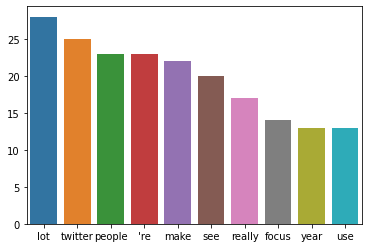

In [299]:
# Frequency Distribution Plot
x, y = [], []
for word, count in freq_dist_pos.most_common(10):
    x.append(word)
    y.append(count)

sns.barplot(x=x, y=y)

### Word Cloud
We can also plot the word cloud to see the most prominent words presented according to their sizes.

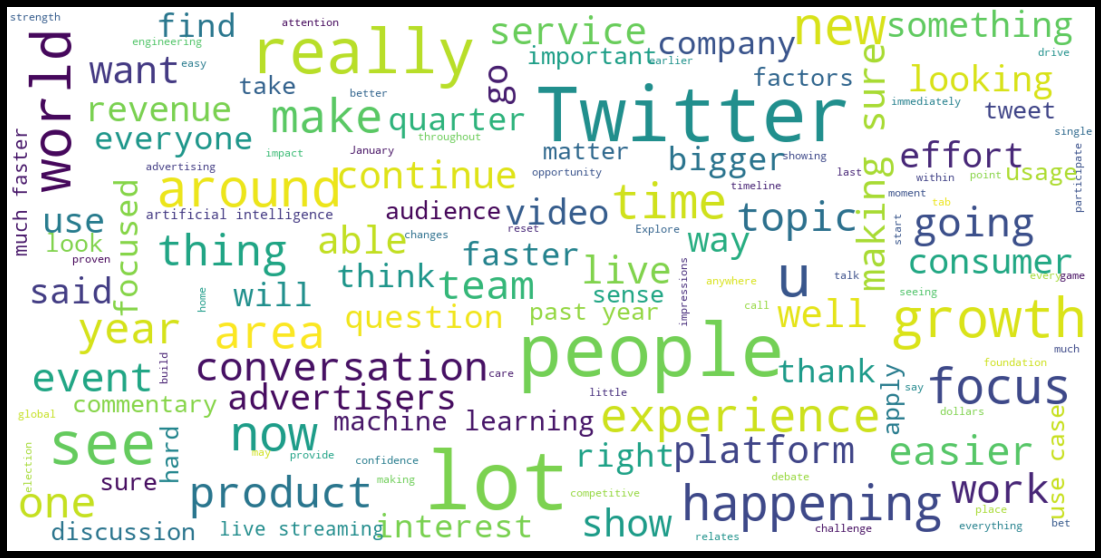

In [301]:
wordcloud = WordCloud(
    background_color='white',
    stopwords=set(STOPWORDS),
    max_words=500,
    max_font_size=30,
    scale=3,
    random_state=1).generate(cleaned_text)
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the **WordCloud** and **FreqDist** we see that there are many words which are frequently used those indicates that the compnay is related to social media and audience like: Twitter, conversation, experience, audience, video, people.

<u>**Even the word twitter is used very frequently (25 times), that leads to an inference that the targetd company can be twitter itself.**</u>

### N-gram distribution
Bigram distribution will allow us to understand the most repetitive context of two words used in the speech.

In [302]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

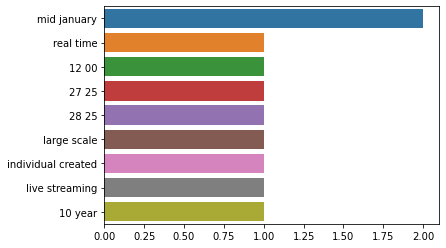

In [311]:
top_n_bigrams = get_top_ngram(nltk.word_tokenize(text), 2)[:10]
x, y = map(list, zip(*top_n_bigrams))
sns.barplot(x=y, y=x)

From the bigram distribution it appears that, there aren't many repetitive context in the speech.

A sentiment analysis is the process for which we take a text (normally an opinion expressed by someone) in order to analyse it and try to extract a meaning out of it. We may use sentiment analysis to categorise a piece of text into a positive, negative or neutral statement. It is commonly applied to analyse opinions about a particular topic or product.

As we already know, the earning calls is a conference call between the management of a company and the media. During the call, management offers an overview of recent performance and provide a guidance for the next quarter expectations. This is where sentiment analysis may be useful. We can take the summary provided by management and apply sentiment analysis to it. That should give us some indication if management has a positive, neutral or negative perspective about the short term company performance.

#### Overall Sentiment Analysis

To perform a sentiment analysis to the full earnings, we just need to use the property sentiment on the text that we want to analyse. In our case, the variable cleaned_text:

In [315]:
sentiment_call = TextBlob(cleaned_text)
print(sentiment_call.sentiment)

Sentiment(polarity=0.19382861290756026, subjectivity=0.47948747159273464)


The outcome shows that the overall sentiment of the call is positive with a polarity score of 0.19 and a subjectivity score of 0.47.

As a whole, we see that the earnings call sentiment was categorised as positive with a score of 0.19. The score is positive but rather low. Let’s see if the result changes by looking into each sentence separately.

### Sentiment Analysis for each sentence

In [316]:
sentiment_call.sentences
negative = 0
positive = 0
neutral = 0
all_sentences = []

for sentence in sentiment_call.sentences:
    if sentence.sentiment.polarity < 0:
        negative += 1
    if sentence.sentiment.polarity > 0:
        positive += 1
    else:
        neutral += 1

    all_sentences.append(sentence.sentiment.polarity)

print('positive: ' + str(positive))
print('negative: ' + str(negative))
print('neutral: ' + str(neutral))

positive: 65
negative: 6
neutral: 49


From the individual sentiment analysis, We see that the speech was overall postitive and represent a positive outlook for the company. There are some negative sentences as well, but those are highly overcome by the positive ones.

We can also plot the individual sentence analysis:

[Text(0, 0, '65'), Text(0, 0, '49'), Text(0, 0, '6')]

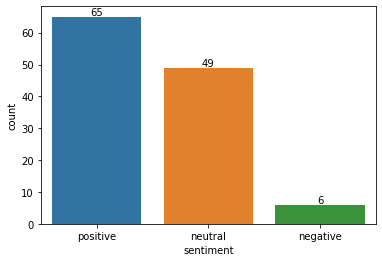

In [321]:
sentiment_df = pd.DataFrame(data=[['positive', positive],
                                  ['neutral', neutral],
                                  ['negative', negative]], columns=['sentiment','count'])
ax = sns.barplot(x = 'sentiment', y = 'count', data=sentiment_df)
ax.bar_label(ax.containers[0])

Now, we see the mean polarity of all sentences:

In [215]:
all_sentences = np.array(all_sentences)
print('sentence polarity: ' + str(all_sentences.mean()))

sentence polarity: 0.13496361360200645


We can represent the overall sentiment distribution inside the speech by marking them with different colors.

In [322]:
COLORS = {
    'green'      : "\033[0;32m{}\033[0m",
    'red'        : "\033[0;31m{}\033[0m",
    'black'      : "\033[0;30m{}\033[0m"
}
def colored(text, color=None):
    """
    Colorize text
    """
    return COLORS[color].format(text)

def sentiment_wise_colorize(line, polarity):
    if polarity > 0:
        return colored(line, 'green')
    elif polarity < 0:
        return colored(line, 'red')
    else:
        return colored(line, 'black')

def show_colored_sentiment(sentiment_call):
    for sentence in sentiment_call.sentences:
        print(sentiment_wise_colorize(str(sentence), sentence.sentiment.polarity))

show_colored_sentiment(sentiment_call)

Good morning everyone and thanks for joining us.
I want to start our call today by looking back.
2016 was a transformative year for us.
Transformations are difficult, and this one was especially challenging.
We started 2016 by resetting and focusing on why people use Twitter.
It's the fastest way to see what's happening, and what everyone is talking about.
We reset and refocused on our strengths, and we achieved one of the hardest things to do for a consumer services scale.
We reversed and reaccelerated our usage.
We're thrilled to report that daily active usage accelerated for the third quarter in a row, and we see that strong growth continuing.
We did this by making the experience a little better every single day.
It may have felt like we weren't changing much this past year, but those hundreds of little changes added up to more predictable and sustained growth we will now use as a foundation to be more inventive and to take bigger risks.
And that's exactly what we are now going to d

We can now show the top positive sentences from the whole speech which had the highest polarity.

In [327]:
df = pd.DataFrame(columns=['polarity', 'sentence'])
pd.set_option('display.max_colwidth', 1000)
for sentence in sentiment_call.sentences:
    if sentence.sentiment.polarity > 0.40:
        df = df.append({'polarity': sentence.sentiment.polarity, 'sentence': str(sentence)}, ignore_index=True)

df.sort_values('polarity', ascending=False)

,polarity,sentence
8,0.700000,The good news is revenue follows audience.
9,0.566667,"As Anthony said, we focused all of 2016 on making sure that we are really aligned around that one use case of showing what's happening before anyone else, being the best place to get your news and all the conversation and commentary that's going on in the world."
1,0.500000,"But we're going to put a lot of attention into Explore, and making sure that we show more topics faster."
2,0.500000,"It seems like there's still a lot of opportunity to see even more as we make it easier and easier for people to tweet, and we focus a lot more on topics that people want to talk about and participate with."
3,0.500000,I'm really confident in this team.
5,0.500000,So we're top of the funnel is one of those areas that could've benefited and we do not see a benefit to the top of the funnel from all of the activity throughout the election time period.
6,0.500000,"So any time that we can drive faster distribution of content, more comprehensive of content, more discussion, or more personalization, we're better at delivering what's happening in the world and what's being talked about."
7,0.500000,"More players, more innovation, some of the competitors have a lot more at stake at this moment in time."
11,0.500000,"So in closing, as I said, I've never been more sure of the value Twitter brings to people in our world."
12,0.450000,"People trust us to carry some of the most important conversations, commentary, critique, events, ideas and questions in the world."


<u>**If we read through a few of the top sentences, that it becomes very clear that the CEO is talking about twitter a lot, and hence this proves that the company that we looking for is twitter.**</u>

### Finding the financial year from the earning call

We'll now do some regex matching and more detailed-textual analysis of the transcript using SpaCy libarary to extract the fiscal year information from the speech.

In [264]:
def extract_events_regex(line):
    matches = []
    # capture thee digit and four digit years (1975) and ranges (1975-1976)
    found = re.findall('(\d\d\d\d?[/\–]?\d?\d?\d?\d?),? ?([^\\.]*)', line)
    try:
        matches = matches + list(map(lambda f: (f[0] if len(f[0]) > 3 else "0" + f[0], f[0], f[1]), found))
    except:
        return []
    return matches

def extract_all_events(text, extract_function):
    all_events = []
    processed = 0
    # Process the events
    for processed, line in enumerate(text.splitlines()):
        events = extract_function(line)
        all_events = all_events + events
        if processed % 100 == 0:
            print('Processed: {}'.format(processed))

    print("Extracted {} events.".format(len(all_events)))

    # Print out the events
    for event in sorted(all_events, key=lambda e: e[0]):
        print("{} - {}".format(event[1], event[2]))
extract_all_events(text, extract_events_regex)

Processed: 0
Processed: 100
Extracted 11 events.
2016 - was a transformative year for us
2016 - by resetting and focusing on why people use Twitter
2016 - challenge was reaccelerating our consumer usage
2016 - really focused on making sure that we have identified and clarified to the team and into our priorities what matters most in terms of the use case
2016 - and all the growth that we are now seeing from that focus as an opportunity to take some bigger risks and to take some bigger bets within the consumer product as well, and nothing to announce today but we have some ideas that we are currently exploring
2016 - than 2015
2016 - 
2016 - on making sure that we are really aligned around that one use case of showing what's happening before anyone else, being the best place to get your news and all the conversation and commentary that's going on in the world
2017 - 's challenge is simplifying and differentiating our revenue products
2017 - I think what we saw in mid-January, as it rela

**From the regex matching, we find a lot of places where we see that either year 2016 or year 2017 is referenced.**

SpaCy library can be used to extract very rich and organised information from text. It works upon the principle of named-entity-recognition (NER) which gives very detailed insights about the text.

In Named-Entity-Recognition - we categorise the words based on their linguistic nature. Here after categorization, we'll filter out only for 'DATE' based entities.

In [329]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(cleaned_text)
for ent in filter(lambda e: e.label_ == 'DATE', doc.ents):
    print(ent.text)

today
2016
a transformative year
2016
the third quarter in a row
every single day
this past year
2017
2016
2016
today
just three months
the past 10 years
the past 10 years
late last year
a year
two years
each quarter
the fourth quarter
the end of the quarter
2016 than 2015
prior years
2016
2017
mid-January
the fourth quarter
February
January
mid-January
February
this year
2016
the past 10 years
every single year
2017
this year
10-year


Corroborated by the results of SpaCy analysis as well, it becomes very clear that **2016-17 has been very prominent part of the conversation and the speaker is referencing to that as the current financial year**.

<u>**FINAL OBSERVATIONS**</u>:

After Running the necessary analysis on the speech data for sentiment analysis and NER extraction, we can deduce answers for our primary goals as -

1. The company we think the provided speech transcript is related to - TWITTER
2. The Financial year CEO is discussing - 2016-17
